**Library Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset overview and Converting categorical value to numerical**

In [2]:
df=pd.read_csv('/kaggle/input/spam-sms/spamsms.csv',encoding=('ISO-8859-1'))
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
df = df.filter(['v1', 'v2'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

<AxesSubplot:>

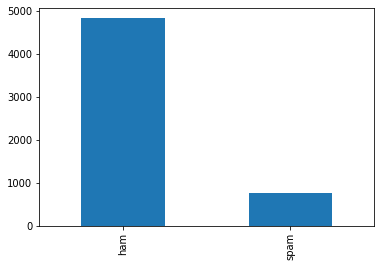

In [6]:
df.v1.value_counts().plot(kind='bar')

In [7]:

df.columns =['Output column', 'Input_column']
df

,Output column,Input_column
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Dummy variable for Output column**

In [8]:
dfe=pd.get_dummies(df,columns=['Output column'],drop_first=True)
dfe

,Input_column,Output column_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


**Vectorizing the Input column as well**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(dfe['Input_column']).toarray()

**Train test split**

In [10]:
x=dfe['Input_column']
y=dfe['Output column_spam']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

**1. Model building and Accurasy testing**

In [11]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

gnb=GaussianNB()
mnb=MultinomialNB()
bnm=BernoulliNB()
lr=LogisticRegression()
kn=KNeighborsClassifier(n_neighbors=1)
sv=SVC(kernel = 'linear', C = 1)

# For gaussian bayes
gnb.fit(x_train,y_train)
pred1=gnb.predict(x_test)
print('Gaussian Bayesian',accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print('\n')
print('--'* 20)

#For Multinoial bayes
mnb.fit(x_train,y_train)
pred2=mnb.predict(x_test)
print('Multinomial bayesian',accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred1))
print('\n')
print('--'* 20)

#For Bernoulli bayesian
bnm.fit(x_train,y_train)
pred3=bnm.predict(x_test)
print('Bernoulli Bayesian',accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred1))
print('\n')
print('--'* 20)

#For Logistic regression 
lr.fit(x_train,y_train)
pred4=lr.predict(x_test)
print('Logistic regression',accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred1))
print('\n')
print('--'* 20)

#For KNN
kn.fit(x_train,y_train)
pred5=kn.predict(x_test)
print('KNN classifier',accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred1))
print('\n')
print('--'* 20)

#For Support vector classifier
sv.fit(x_train,y_train)
pred6=sv.predict(x_test)
print('Supprt vector',accuracy_score(y_test,pred6))
print(confusion_matrix(y_test,pred1))

Gaussian Bayesian 0.8959641255605382
[[864  93]
 [ 23 135]]


----------------------------------------
Multinomial bayesian 0.9757847533632287
[[864  93]
 [ 23 135]]


----------------------------------------
Bernoulli Bayesian 0.9757847533632287
[[864  93]
 [ 23 135]]


----------------------------------------
Logistic regression 0.9766816143497757
[[864  93]
 [ 23 135]]


----------------------------------------
KNN classifier 0.9452914798206278
[[864  93]
 [ 23 135]]


----------------------------------------
Supprt vector 0.9820627802690582
[[864  93]
 [ 23 135]]


# Thank you